# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"C:\Users\Tasnia Wahid\Downloads\Starter_Code (3)\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\Tasnia Wahid\Downloads\Starter_Code (3)\Starter_Code\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')


# Display the data table for preview
print(merged_data.head())


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [6]:
# Checking the number of mice.
unique_mice_count = merged_data['Mouse ID'].nunique()
print(f"Number of unique mice IDs in the data: {unique_mice_count}")

Number of unique mice IDs in the data: 249


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print("Duplicate mice based on Mouse ID and Timepoint:")
print(duplicate_mice)

Duplicate mice based on Mouse ID and Timepoint:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137 

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
# Identify duplicate rows based on Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the unique duplicate Mouse IDs
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Retrieve all data for the duplicate Mouse ID(s)
all_duplicate_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display all data associated with the duplicate Mouse ID(s)
print("All data for the duplicate Mouse ID(s):")
print(all_duplicate_data)


All data for the duplicate Mouse ID(s):
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g98

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of unique mice in the clean DataFrame
# Check the number of unique mice in the original merged dataset
number_of_unique_mice_original = merged_data['Mouse ID'].nunique()
print(f"Number of unique mice in the original merged dataset: {number_of_unique_mice_original}")
# Identify duplicate Mouse ID and Timepoint combinations in the original merged data
duplicate_mice_before_cleaning = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the rows containing duplicate Mouse ID and Timepoint before cleaning
print("Duplicate mice based on Mouse ID and Timepoint before cleaning:")
print(duplicate_mice_before_cleaning)
# Remove the duplicate Mouse ID and Timepoint combinations
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Identify duplicate Mouse ID and Timepoint combinations in the cleaned data
duplicate_mice_after_cleaning = cleaned_data[cleaned_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the rows containing duplicate Mouse ID and Timepoint after cleaning
print("Duplicate mice based on Mouse ID and Timepoint after cleaning:")
print(duplicate_mice_after_cleaning)



Number of unique mice in the original merged dataset: 249
Duplicate mice based on Mouse ID and Timepoint before cleaning:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

        

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the cleaned data by 'Drug Regimen' and calculate summary statistics
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for better readability
summary_statistics.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Display the summary statistics DataFrame
print("Summary Statistics for Tumor Volume by Drug Regimen:")
print(summary_statistics)



Summary Statistics for Tumor Volume by Drug Regimen:
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Calculate summary statistics using agg() in a single line
summary_statistics_advanced = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)

# Display the summary statistics DataFrame
print("Summary Statistics for Tumor Volume by Drug Regimen (Advanced):")
print(summary_statistics_advanced)


Summary Statistics for Tumor Volume by Drug Regimen (Advanced):
                   Mean     Median   Variance  Standard_Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

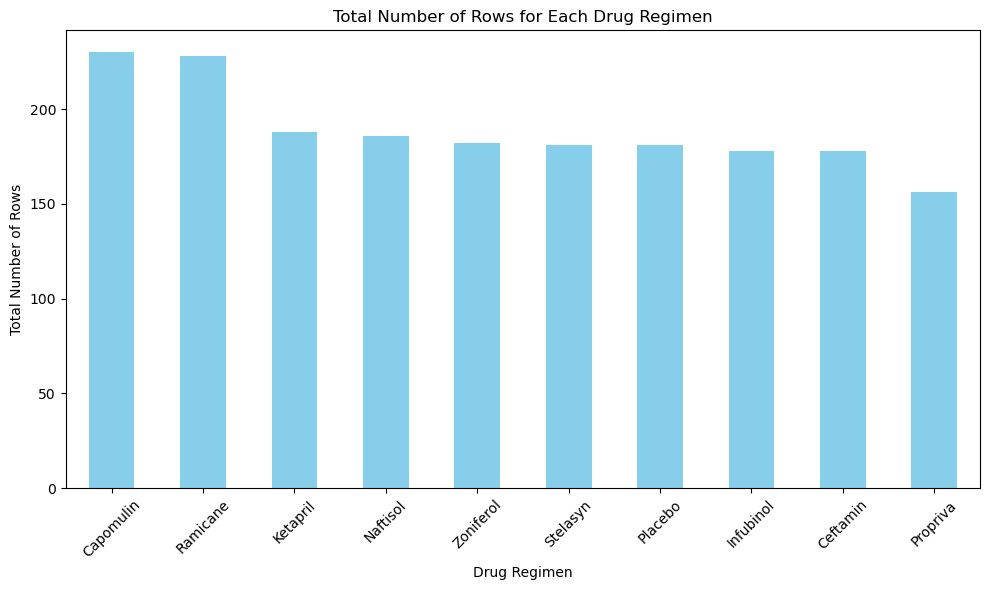

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import matplotlib.pyplot as plt

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
total_rows_per_regimen = cleaned_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas DataFrame.plot() method
total_rows_per_regimen.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


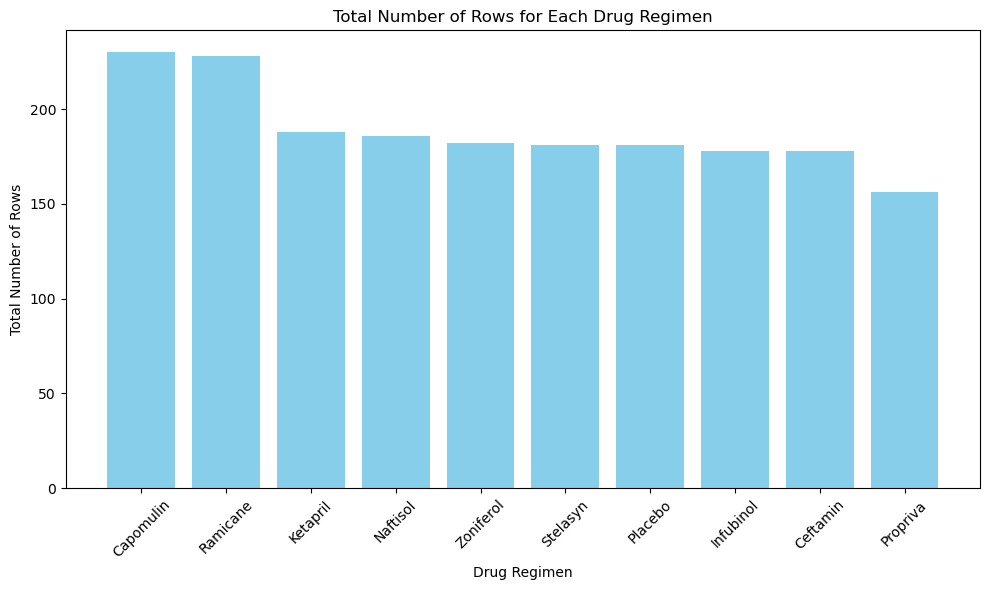

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
total_rows_per_regimen = cleaned_data['Drug Regimen'].value_counts()

# Create a bar plot using Matplotlib's pyplot methods
plt.figure(figsize=(10, 6))
plt.bar(total_rows_per_regimen.index, total_rows_per_regimen, color='skyblue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


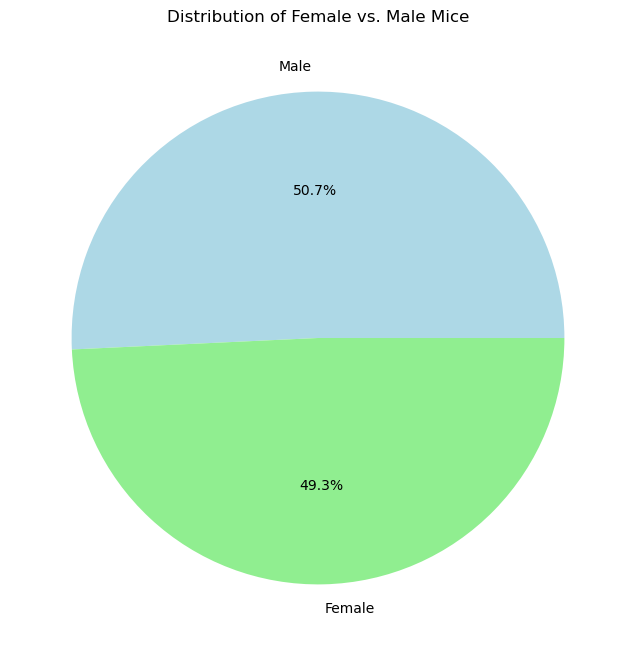

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import matplotlib.pyplot as plt

# Calculate the distribution of female versus male mice in the study
gender_distribution = cleaned_data['Sex'].value_counts()

# Create a pie plot using Pandas DataFrame.plot() method
gender_distribution.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('')
plt.show()


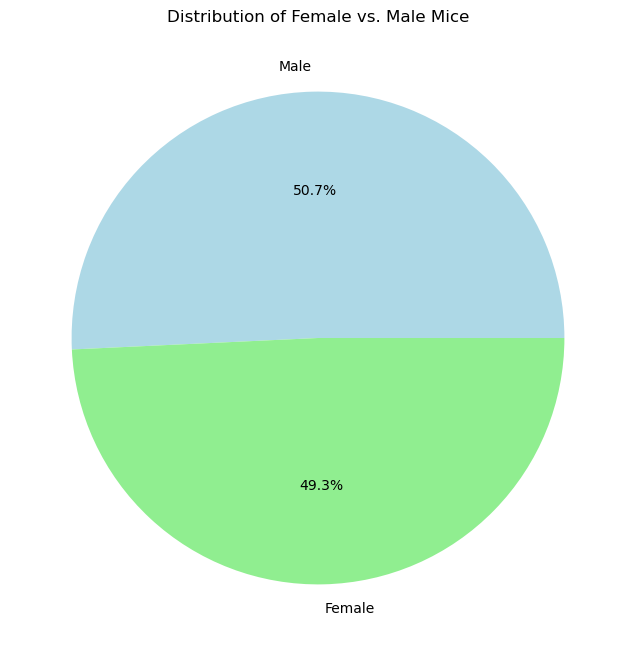

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Calculate the distribution of female versus male mice in the study
gender_distribution = cleaned_data['Sex'].value_counts()

# Create a pie plot using Matplotlib's pyplot methods
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Female vs. Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Define the treatment regimens of interest
treatments_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the cleaned data for the specified treatment regimens
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatments_of_interest)]

# Group the filtered data by 'Mouse ID' to find the last (greatest) time point for each mouse
grouped_last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the grouped data with the original dataset to obtain the final tumor volume for each mouse
final_tumor_volumes = grouped_last_timepoint.merge(filtered_data, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Display the DataFrame showing the final tumor volume of each mouse for the specified treatment regimens
print("Final Tumor Volume of Each Mouse Across Treatment Regimens:")
print(final_tumor_volumes)

# Start by getting the last (greatest) timepoint for each mouse

# Group the data by 'Mouse ID' and find the maximum timepoint for each mouse
max_timepoint_per_mouse = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Display the DataFrame showing the last timepoint for each mouse
print("Last (Greatest) Timepoint for Each Mouse:")
print(max_timepoint_per_mouse)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Merge the 'max_timepoint_per_mouse' DataFrame with the original cleaned DataFrame
merged_data_last_timepoint = pd.merge(max_timepoint_per_mouse, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the merged DataFrame containing tumor volume at the last timepoint for each mouse
print("Tumor Volume at the Last Timepoint for Each Mouse:")
print(merged_data_last_timepoint[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']])


Final Tumor Volume of Each Mouse Across Treatment Regimens:
   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           38.407618
4      a444     Ramicane           43.047543
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           31.896238
97     y865     Ceftamin           64.729837
98     z578     Ramicane           30.638696
99     z581    Infubinol           62.754451

[100 rows x 3 columns]
Last (Greatest) Timepoint for Each Mouse:
    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
244     z435         10
245     z578         45
246     z581         45
247     z795         45
248     z969         45

[249 rows x 2 columns]
Tumor Volume at the La

In [24]:
# Put treatments into a list for for loop (and later for plot labels)
# Extract unique treatment regimens from the dataset
treatments_list = cleaned_data['Drug Regimen'].unique().tolist()

# Display the list of unique treatment regimens
print("List of Treatments:")
print(treatments_list)


# Create empty list to fill with tumor vol data (for plotting)
# List of treatments
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']  # Update this with your treatments

# Create an empty dictionary to store tumor volume data for each treatment
tumor_volume_data = {treatment: [] for treatment in treatments_list}

# Loop through each treatment
for treatment in treatments_list:
    # Filter the data for the current treatment
    treatment_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append tumor volume data to the respective list in the dictionary
    tumor_volume_data[treatment] = treatment_data.values.tolist()
    
    # Calculate quartiles and IQR for the current treatment
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate lower and upper bounds to determine outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Find potential outliers for the current treatment
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print information about potential outliers
    print(f"Results for {treatment}:")
    print(f" - Lower Quartile: {lower_quartile}")
    print(f" - Upper Quartile: {upper_quartile}")
    print(f" - Interquartile Range (IQR): {iqr}")
    print(f" - Lower Bound: {lower_bound}")
    print(f" - Upper Bound: {upper_bound}")
    print(f" - Potential Outliers: {outliers}\n")

    
 

List of Treatments:
['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn', 'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin']
Results for Capomulin:
 - Lower Quartile: 37.685932865
 - Upper Quartile: 45.0
 - Interquartile Range (IQR): 7.314067135000002
 - Lower Bound: 26.714832162499995
 - Upper Bound: 55.9711007025
 - Potential Outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64

Results for Ramicane:
 - Lower Quartile: 36.674634585
 - Upper Quartile: 45.0
 - Interquartile Range (IQR): 8.325365415
 - Lower Bound: 24.1865864625
 - Upper Bound: 57.488048122500004
 - Potential Outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64

Results for Infubinol:
 - Lower Quartile: 47.3123533
 - Upper Quartile: 57.314443967500004
 - Interquartile Range (IQR): 10.002090667500006
 - Lower Bound: 32.309217298749985
 - Upper Bound: 72.31757996875001
 - Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results fo

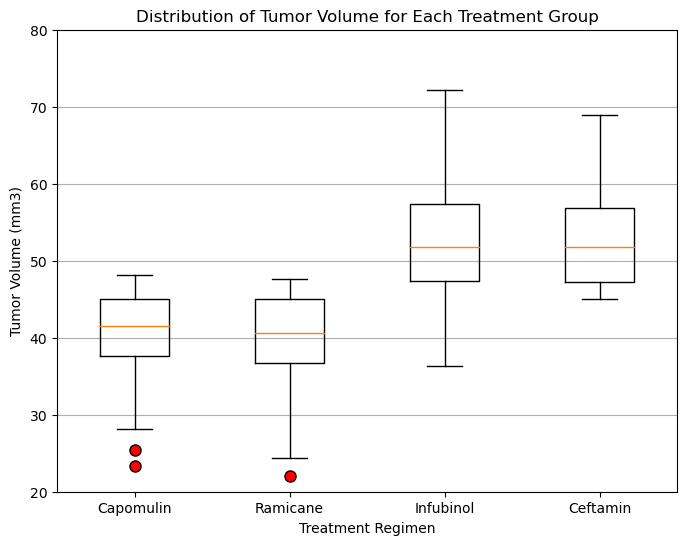

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# List of treatments
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']  # Update this with your treatments

# Create an empty dictionary to store tumor volume data for each treatment
tumor_volume_data = {treatment: [] for treatment in treatments_list}

# Loop through each treatment
for treatment in treatments_list:
    # Filter the data for the current treatment
    treatment_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append tumor volume data to the respective list in the dictionary
    tumor_volume_data[treatment] = treatment_data.values.tolist()

# Convert dictionary values to a list for plotting
data_to_plot = list(tumor_volume_data.values())

# Create a box plot to visualize the distribution of tumor volume for each treatment group
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, labels=treatments_list, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(20, 80)  # Optional: Set ylim to customize y-axis limits for better visualization
plt.grid(axis='y')  # Optional: Show grid for y-axis
plt.show()


## Line and Scatter Plots

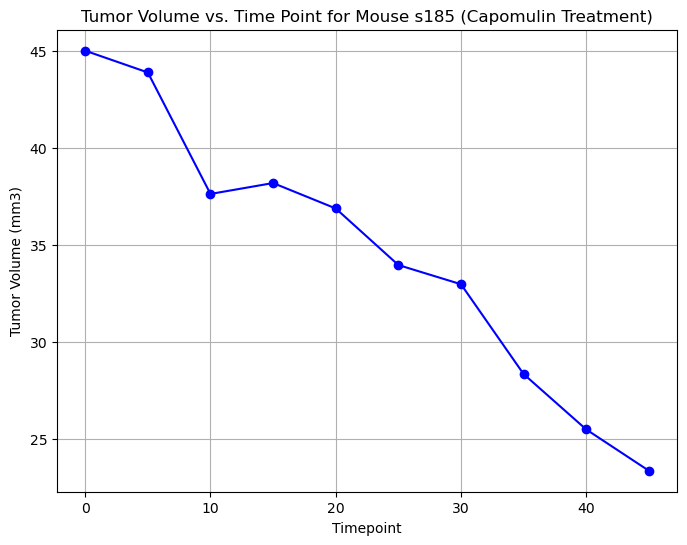

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt

# Select a single mouse treated with Capomulin (e.g., 's185')
selected_mouse = 's185'
mouse_data_capomulin = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == selected_mouse)]

# Check if the selected mouse exists in the Capomulin group
if not mouse_data_capomulin.empty:
    # Generate a line plot of tumor volume vs. time point for the selected mouse treated with Capomulin
    plt.figure(figsize=(8, 6))
    plt.plot(mouse_data_capomulin['Timepoint'], mouse_data_capomulin['Tumor Volume (mm3)'], marker='o', color='blue')
    plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse} (Capomulin Treatment)')
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')
    plt.grid(True)
    plt.show()
else:
    print(f"No data found for Mouse {selected_mouse} treated with Capomulin.")


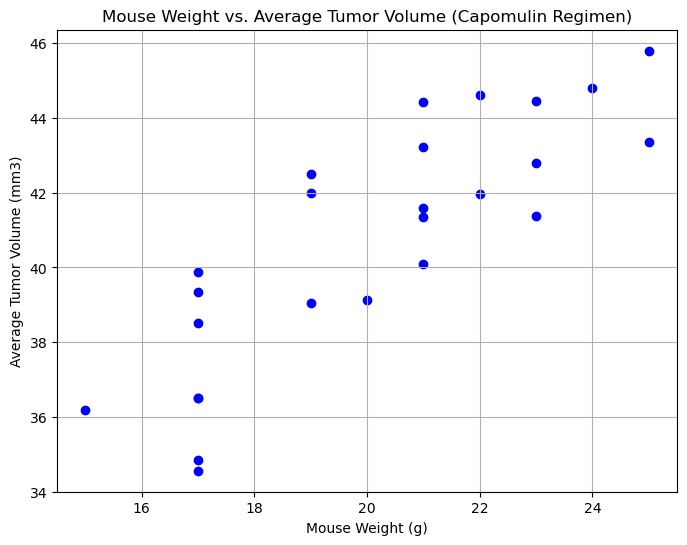

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse treated with Capomulin
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume data with the mouse metadata to get mouse weight
merged_data = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID')

# Generate a scatter plot of mouse weight vs. average tumor volume for Capomulin regimen
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

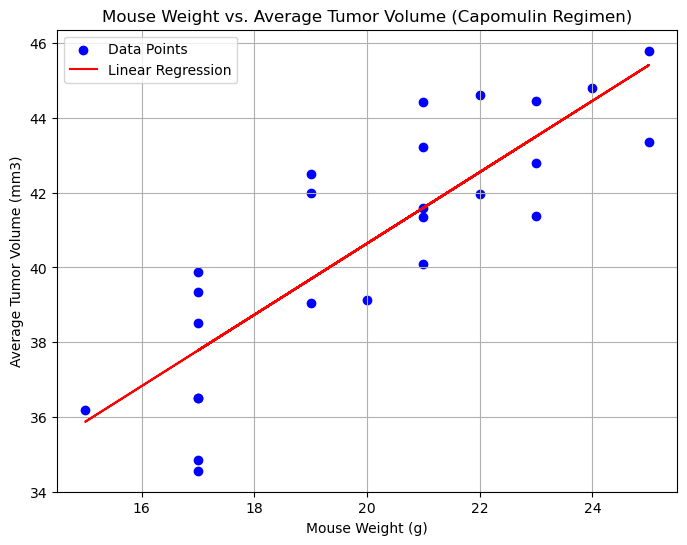

Correlation Coefficient: 0.8419363424694722
R-squared Value: 0.7088568047708723
Slope: 0.9544396890241049
Intercept: 21.552160532685008
Standard Error: 0.12754359033201323


In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse treated with Capomulin
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume data with the mouse metadata to get mouse weight
merged_data = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID')

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

# Perform linear regression between mouse weight and average tumor volume
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Generate a scatter plot of mouse weight vs. average tumor volume for Capomulin regimen
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', label='Data Points')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Plot the linear regression line on the scatter plot
plt.plot(merged_data['Weight (g)'], intercept + slope * merged_data['Weight (g)'], color='red', label='Linear Regression')

plt.legend()
plt.grid(True)
plt.show()

# Display the correlation coefficient and regression statistics
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"R-squared Value: {r_value**2}")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Standard Error: {std_err}")
